# Modeling, Training and Evaluation

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
import types 
from botocore.client import Config 
import ibm_boto3 
def __iter__(self): return 0 
# @hidden_cell 
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials. 
# You might want to remove those credentials before you share the notebook. 
client_d812e9ff73554acb99ec832832ddfe49 = ibm_boto3.client(service_name='s3', 
                                                           ibm_api_key_id='-rPWCJ6tlad28m4TQMS_rhBCiHbQ4d2agItYcfqgqzen', 
                                                           ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token", 
                                                           config=Config(signature_version='oauth'), 
                                                           endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
body = client_d812e9ff73554acb99ec832832ddfe49.get_object(Bucket='progpy19cabd749c62e43b992119d84b67f744f',Key='Modeling Data Set for XYZ.xlsx')['Body'] 
# add missing __iter__ method, so pandas accepts body as file-like object 
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 
df_data_1 = pd.read_excel(body)

In [3]:
df_data_0 = df_data_1 # We store the data in df_data_0 so that during coding if we change df_data_0 by mistake, it we need to reload data again,
                               #we can simply start from here rather than loading the once again.

In [4]:
#Data cleansing process involved several process such as checking emptiness, statistical properties, duplication, null values, shapes etc
df_data_0.head()
df_data_0.describe()
df_data_0.duplicated().sum()
df_data_0.empty
df_data_0.isna().sum()
Row, Col = df_data_0.shape
#print(f'The Data has {Row} rows and {Col} columns.') 

In [5]:
#Filtering out the null values as we have enough data and we don't need to compromise with the data quality by incorporating data imputation.
df_data_0 = df_data_0.dropna(axis=0, how='any')
df_data_0

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,BU_CODE,G_BU,Partition
0,23226186,49,49,0,0,0,0,0,49,0,...,1.0,0.0,0.0,0.0,1,1,0,XYZ,EXP_XYZ,1_Training
1,23244325,42,42,0,0,0,0,42,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
2,23235268,45,45,0,0,0,0,45,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
3,23235330,135,135,0,0,0,0,135,0,0,...,0.0,0.0,0.0,0.0,1,1,1,XYZ,CXG_XYZ,2_Testing
4,23235456,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXS_XYZ,2_Testing
5,23236123,44,44,0,0,0,11,33,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
6,23236219,136,63,73,0,73,63,0,0,0,...,0.0,0.0,0.0,1.0,1,1,1,XYZ,AXM_XYZ,2_Testing
7,23236893,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
8,23237142,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,EXP_XYZ,2_Testing
9,23237643,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training


In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df_data_0['G_BU'])
df_data_0['G_BU_transform'] = enc.transform(df_data_0['G_BU'])
df_data_0.columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['KEY', 'OPP_Natural Age', 'Age since SSM Validated',
       'Age before SSM Validated', 'SSM_1 _ELXAPSED_DAYS',
       'SSM_2 _ELXAPSED_DAYS', 'SSM_3 _ELXAPSED_DAYS', 'SSM_4 _ELXAPSED_DAYS',
       'SSM_5 _ELXAPSED_DAYS', 'OPP_Backward count', 'OPP_Forward count',
       'DTL_Natural Age', 'RM_STATUS_Count', 'RdM_NIR_ELXAPSED_DAYS',
       'RdM_STR_ELXAPSED_DAYS', 'RdM_KEY_ELXAPSED_DAYS',
       'RdM_ATR_ELXAPSED_DAYS', 'RdM_SOL_ELXAPSED_DAYS', 'RdM_WNR_DAYS',
       'RdM_NonWNR_DAYS', 'RdM_Forward count', 'RdM backward count',
       'Forward quarter_count', 'Backward quarter_count', 'Roller_FLXAg_NUM',
       'Chronic_Roller_FLXAg', 'Not_Roller_FLXAg',
       'SAXMe_Quarter_Updater_FLXAg', 'Deal_Accelerator_FLXAg',
       'One_Time_Roller_FLXAg', 'Record_Count', 'AGE_FLXAG', 'OUTCOME',
       'BU_CODE', 'G_BU', 'Partition', 'G_BU_transform'],
      dtype='object')

In [7]:
#Split the training & test data
#Data comes with a column 'Partition' that indicates a segregates between Training data and Test data. This is done to compare results with others

df_data_train = df_data_0[df_data_0['Partition'] == "1_Training"]
df_data_test = df_data_0[df_data_0['Partition'] == "2_Testing"]

#Drop the columns not going to be used for the Modelling. Rest of the fields are numeric and going to be used during modelling.

df_data_train = df_data_train.drop(['BU_CODE','Partition', 'G_BU', 'KEY'], axis = 1)
df_data_test = df_data_test.drop(['BU_CODE','Partition', 'G_BU', 'KEY'], axis = 1)

In [8]:
# Segregate the train Data and target variables

X_train = df_data_train.drop(['OUTCOME'], axis = 1)
y_train = df_data_train['OUTCOME']

# Segregate the test Data and target variables
X_test = df_data_test.drop(['OUTCOME'], axis = 1)
y_test = df_data_test['OUTCOME']

# Applying Support Vector Machine

In [9]:
#Define a model and train
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=1.0, gamma=0.10) 
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# predict the test set
y_predsvm = svc.predict(X_test)

In [11]:
# Measure the accuracy
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test, y_predsvm)*100
print("Accuracy", Accuracy, "%")

Accuracy 65.34333149420675 %


In [12]:
# Evaluate the Model using classification report and Confusion Matrix.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predsvm))
print(classification_report(y_test,y_predsvm))

[[ 5072 23429]
 [ 4209 47038]]
              precision    recall  f1-score   support

           0       0.55      0.18      0.27     28501
           1       0.67      0.92      0.77     51247

   micro avg       0.65      0.65      0.65     79748
   macro avg       0.61      0.55      0.52     79748
weighted avg       0.62      0.65      0.59     79748



In [23]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Calculate roc auc
roc_value = roc_auc_score(y_test,y_predsvm)
print('AUC: %.2f' % roc_value)

fpr, tpr, thresholds = roc_curve(y_test,y_predsvm)

AUC: 0.55


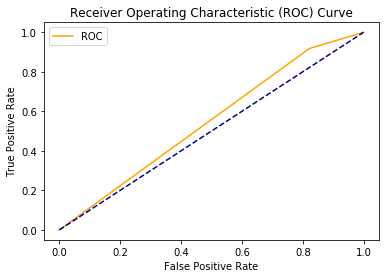

In [17]:
plot_roc_curve(fpr, tpr)

# Applying Support Vector Machine with PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components=2)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [19]:
svcpca = SVC(kernel='rbf',C=1.0, gamma=0.1) 
svcpca.fit(X_t_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svcpca.score(X_t_test, y_test)

0.6793900787480563

In [21]:
y_predpca = svcpca.predict(X_t_test)

In [22]:
print(accuracy_score(y_test,y_predpca))
print(confusion_matrix(y_test,y_predpca))
print(classification_report(y_test,y_predpca))

0.6793900787480563
[[ 7697 20804]
 [ 4764 46483]]
              precision    recall  f1-score   support

           0       0.62      0.27      0.38     28501
           1       0.69      0.91      0.78     51247

   micro avg       0.68      0.68      0.68     79748
   macro avg       0.65      0.59      0.58     79748
weighted avg       0.66      0.68      0.64     79748



In [23]:
#Calculate ROC, fpr, TPR and threshold value
roc_value1 = roc_auc_score(y_test,y_predpca)
print('AUC: %.2f' % roc_value1)

fpr1, tpr1, thresholds1 = roc_curve(y_test,y_predpca)

AUC: 0.59


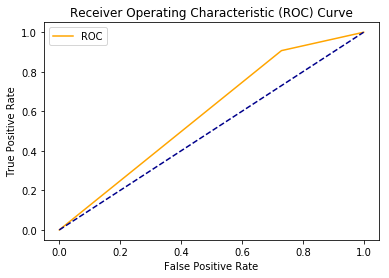

In [24]:
#Plot ROC for SVM with PCA
plot_roc_curve(fpr1, tpr1)

# Naive Bayes classifier

In [9]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
modelN = GaussianNB()

# Train the model using the training sets
modelN.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
#Predict Output
y_predN= modelN.predict(X_test) # 0: Close, 1: Open

In [15]:
#Calculate the accuracy
score_bayes = accuracy_score(y_test,y_predN)
print ("Accuracy for Naive Bayes is:", score_bayes)
print(confusion_matrix(y_test,y_predN))
print(classification_report(y_test,y_predN))

Accuracy for Naive Bayes is: 0.602084064804133
[[ 7891 20610]
 [11123 40124]]
              precision    recall  f1-score   support

           0       0.42      0.28      0.33     28501
           1       0.66      0.78      0.72     51247

   micro avg       0.60      0.60      0.60     79748
   macro avg       0.54      0.53      0.52     79748
weighted avg       0.57      0.60      0.58     79748



In [16]:
#Calculate ROC, fpr, TPR and threshold value
roc_valueN = roc_auc_score(y_test,y_predN)
print('AUC: %.2f' % roc_valueN)

fpr2, tpr2, thresholds2 = roc_curve(y_test,y_predN)

AUC: 0.53


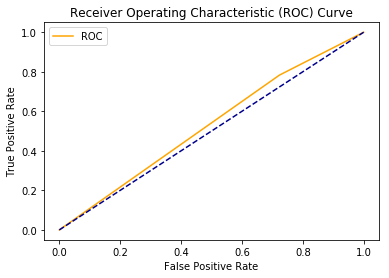

In [30]:
#Plot ROC for SVM with PCA
plot_roc_curve(fpr2, tpr2)

# Random forest classifier

In [17]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_pred_rfc=rfc.predict(X_test)

In [61]:
#Calculate the accuracy
score_rfc = accuracy_score(y_test,y_pred_rfc)
print ("Accuracy:", round(score_rfc*100,0),"%", '\n')
print('Confusion Matrix','\n',confusion_matrix(y_test,y_pred_rfc))
print('\n')
print('Classification Report','\n',classification_report(y_test,y_pred_rfc))

Accuracy: 75.0 % 

Confusion Matrix 
 [[16087 12414]
 [ 7754 43493]]


Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.56      0.61     28501
           1       0.78      0.85      0.81     51247

   micro avg       0.75      0.75      0.75     79748
   macro avg       0.73      0.71      0.71     79748
weighted avg       0.74      0.75      0.74     79748



AUC: 0.71


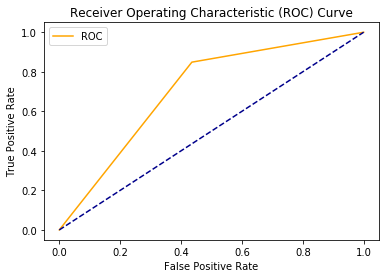

In [35]:
#Calculate ROC, fpr, TPR and threshold value
roc_valuerfc = roc_auc_score(y_test,y_pred_rfc)
print('AUC: %.2f' % roc_valuerfc)

fpr3, tpr3, thresholds3 = roc_curve(y_test,y_pred_rfc)
#Plot ROC 
plot_roc_curve(fpr3, tpr3)

In [25]:
# Extract feature importances

fi = pd.DataFrame({'feature': list(X_train.columns),'importance': rfc.feature_importances_}).sort_values('importance', ascending = False)

# Display

fi.head(20)

,feature,importance
10,DTL_Natural Age,0.100645
0,OPP_Natural Age,0.100517
1,Age since SSM Validated,0.099046
31,G_BU_transform,0.098045
5,SSM_3 _ELXAPSED_DAYS,0.088368
6,SSM_4 _ELXAPSED_DAYS,0.061889
11,RM_STATUS_Count,0.060613
18,RdM_NonWNR_DAYS,0.059394
13,RdM_STR_ELXAPSED_DAYS,0.049239
2,Age before SSM Validated,0.034003


# Deep Learning Convolution Neural Network

In [26]:
#Install depencies
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 3.2MB 17.3MB/s eta 0:00:01


In [27]:
#Import Libraries for creating a CNN model
import tensorflow as tf
import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
# define the keras model
cnnmodel = Sequential()
cnnmodel.add(Dense(12, input_dim=32, activation='relu'))
cnnmodel.add(Dense(8, activation='relu'))
cnnmodel.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
# compile the keras model
cnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
# fit the keras model on the dataset
cnnmodel.fit(X_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
79977/79977 [==============================] - 122s 2ms/step - loss: 0.6365 - acc: 0.6391
Epoch 2/10
79977/79977 [==============================] - 120s 2ms/step - loss: 0.6355 - acc: 0.6391
Epoch 3/10
79977/79977 [==============================] - 122s 2ms/step - loss: 0.6348 - acc: 0.6390
Epoch 4/10
79977/79977 [==============================] - 112s 1ms/step - loss: 0.6344 - acc: 0.6392
Epoch 5/10
79977/79977 [==============================] - 121s 2ms/step - loss: 0.6341 - acc: 0.6396
Epoch 6/10
79977/79977 [==============================] - 120s 2ms/step - loss: 0.6339 - acc: 0.6394
Epoch 7/10
79977/79977 [==============================] - 123s 2ms/step - loss: 0.6337 - acc: 0.6394
Epoch 8/10
79977/79977 [==============================] - 119s 1ms/step - loss: 0.6331 - acc: 0.6393
Epoch 9/10
79977/79977 [==============================] - 118s 1ms/step - loss: 0.6327 - acc: 0.6392
Epoch 10/10
79977/79977 [==============================] - 120s 1ms/step - loss: 0.6326 - a

In [32]:
# make probability predictions with the model
y_predcnn = cnnmodel.predict_classes(X_test)

In [33]:
# evaluate the keras model
_, accuracy_cnn = cnnmodel.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy_cnn*100))
print(confusion_matrix(y_test,y_predcnn))
print(classification_report(y_test,y_predcnn))

79748/79748 [==============================] - 861s 11ms/step
Accuracy: 64.33
[[  128 28373]
 [   76 51171]]
              precision    recall  f1-score   support

           0       0.63      0.00      0.01     28501
           1       0.64      1.00      0.78     51247

   micro avg       0.64      0.64      0.64     79748
   macro avg       0.64      0.50      0.40     79748
weighted avg       0.64      0.64      0.51     79748



AUC: 0.50


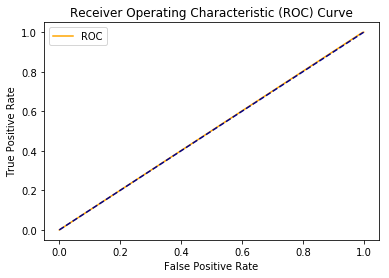

In [34]:
#Calculate ROC
cnnroc_value = roc_auc_score(y_test,y_predcnn)
print('AUC: %.2f' % cnnroc_value)

fpr4, tpr4, thresholds4 = roc_curve(y_test,y_predcnn)
plot_roc_curve(fpr4, tpr4)

In [ ]:
Since Random Forest classifier is giving us the best results, interms of accuracy and F1 score, we choose Random Forest for the Model Deployment.

# Below is the preparation for data balancing

In [38]:
#Rows with 1 outcome is: 51113
#Rows with 0 outcome is: 28864

# Separate majority and minority classes
df_maj = df_data_train[df_data_train['OUTCOME'] == 1]
df_min = df_data_train[df_data_train['OUTCOME'] == 0]
 
# Downsample majority class
df_maj_ds = resample(df_maj, 
                                 replace=False,    # sample without replacement
                                 n_samples=28864,     # to match minority class
                                 random_state=111) # reproducible results
 
# Combine minority class with downsampled majority class
df_data_train_b = pd.concat([df_maj_ds, df_min])


In [39]:
df_data_train_b

,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,OPP_Forward count,...,Roller_FLXAg_NUM,Chronic_Roller_FLXAg,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,G_BU_transform
133326,23,23,0,0,0,16,0,7,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
139736,170,170,0,0,0,170,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
74390,212,205,7,0,7,0,144,42,2,2,...,5.0,1.0,0.0,0.0,0.0,0.0,1,1,1,3
153144,85,85,0,0,0,0,84,0,2,0,...,4.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
35449,253,253,0,0,0,246,7,0,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1,5
32921,260,260,0,0,0,225,35,0,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1,4
46261,28,28,0,0,0,28,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1
114993,212,212,0,0,0,212,0,0,0,0,...,4.0,0.0,0.0,0.0,0.0,1.0,1,1,1,4
156250,320,320,0,0,0,320,0,0,0,0,...,5.0,1.0,0.0,0.0,0.0,0.0,1,1,1,6
47317,16,2,14,14,0,2,0,0,0,1,...,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1,4


In [40]:
#Lets check for the distribution of target/outcome after performing data balancing
a = df_data_train_b[df_data_train_b['OUTCOME'] == 1].count()[1]
b = df_data_train_b[df_data_train_b['OUTCOME'] == 0].count()[1]
a1 = a/(a+b)*100
b1 = b/(a+b)*100
print('Rows with 1 outcome is:', a)
print('Rows with 0 outcome is:', b)
print('Percentage of rows with 1 outcome is:', round(a1),'%')
print('Percentage of rows with 0 outcome is:', round(b1),'%')

Rows with 1 outcome is: 28864
Rows with 0 outcome is: 28864
Percentage of rows with 1 outcome is: 50.0 %
Percentage of rows with 0 outcome is: 50.0 %


In [41]:
# Segregate the train Data and target variables

X_train_b = df_data_train_b.drop(['OUTCOME'], axis = 1)
y_train_b = df_data_train_b['OUTCOME']

# Random Forest Classifiers with balanced data

In [42]:
#Create a Gaussian Classifier
rfc_b=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc_b.fit(X_train_b,y_train_b)

y_pred_rfc_b=rfc_b.predict(X_test)

In [62]:
#Calculate the accuracy
score_rfc_b = accuracy_score(y_test,y_pred_rfc_b)
print ("Accuracy:", round(score_rfc_b*100,0),"%", '\n')
print('Confusion Matrix','\n',confusion_matrix(y_test,y_pred_rfc_b))
print('\n')
print('Classification Report','\n',classification_report(y_test,y_pred_rfc_b))

Accuracy: 0.6941114510708732
[[20775  7726]
 [16668 34579]]
              precision    recall  f1-score   support

           0       0.55      0.73      0.63     28501
           1       0.82      0.67      0.74     51247

   micro avg       0.69      0.69      0.69     79748
   macro avg       0.69      0.70      0.68     79748
weighted avg       0.72      0.69      0.70     79748

Accuracy: 69.0 % 

Confusion Matrix 
 [[20775  7726]
 [16668 34579]]


Classification Report 
               precision    recall  f1-score   support

           0       0.55      0.73      0.63     28501
           1       0.82      0.67      0.74     51247

   micro avg       0.69      0.69      0.69     79748
   macro avg       0.69      0.70      0.68     79748
weighted avg       0.72      0.69      0.70     79748



AUC: 0.70


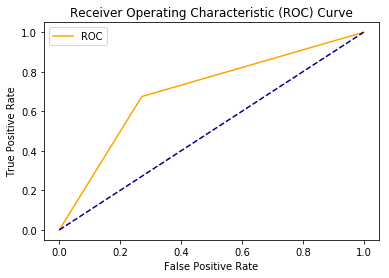

In [44]:
#Calculate ROC, fpr, TPR and threshold value
roc_valuerfcb = roc_auc_score(y_test,y_pred_rfc_b)
print('AUC: %.2f' % roc_valuerfcb)

fpr3b, tpr3b, thresholds3b = roc_curve(y_test,y_pred_rfc_b)
#Plot ROC 
plot_roc_curve(fpr3b, tpr3b)